In [1]:
import pandas as pd 
import numpy as np 
import os 



In [2]:
df = pd.read_csv("ml-100k\\ml-100k\\u.data", header=None,sep='\t')

In [3]:
!more "ml-100k/ml-100k/README"

SUMMARY & USAGE LICENSE

MovieLens data sets were collected by the GroupLens Research Project
at the University of Minnesota.
 
This data set consists of:
        * 100,000 ratings (1-5) from 943 users on 1682 movies. 
        * Each user has rated at least 20 movies. 
        * Simple demographic info for the users (age, gender, occupation, zip)

The data was collected through the MovieLens web site
(movielens.umn.edu) during the seven-month period from September 19th, 
1997 through April 22nd, 1998. This data has been cleaned up - users
who had less than 20 ratings or did not have complete demographic
information were removed from this data set. Detailed descriptions of
the data file can be found at the end of this file.

Neither the University of Minnesota nor any of the researchers
involved can guarantee the correctness of the data, its suitability
for any particular purpose, or the validity of results based on the
use of the data set.  The data set may be used for any research
pur

In [4]:
df.head()

,0,1,2,3
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [5]:
df.columns = ['user_id','item_id','rating','timestamp']

In [6]:
df.head()

,user_id,item_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [7]:
user_item_matrix= df.pivot(index='user_id',columns='item_id', values='rating').reset_index(drop=True)

In [8]:
user_item_matrix

item_id,1,2,3,4,5,6,7,8,9,10,...,1673,1674,1675,1676,1677,1678,1679,1680,1681,1682
0,5.0,3.0,4.0,3.0,3.0,5.0,4.0,1.0,5.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
938,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
939,NaN,NaN,NaN,2.0,NaN,NaN,4.0,5.0,3.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
940,5.0,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
941,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
def get_rating(arr,idxs):
    
    return arr[idxs]

In [14]:
indices_list = (list(zip(*(np.where(np.isfinite(user_item_matrix.values))))))

In [15]:
import random



In [16]:
alpha = .001
lambd=0.01



In [18]:
epochs = 50
k = 2
m,n = user_item_matrix.shape
U = np.random.rand(m,k)
V = np.random.rand(n,k)
diff_in_mean = []
arr = user_item_matrix.values
for k in range(epochs):
    random.shuffle(indices_list)
    for idx in indices_list:
        i, j = idx
        r_ij = get_rating(arr,idx)
        e_ij = r_ij - np.dot(U[i,:],V[j,:])
        
        u_ij = U[i,:] + alpha*(e_ij*V[j,:]-lambd*U[i,:])
        v_ij = V[j,:] + alpha*(e_ij*U[i,:]-lambd*V[j,:])

        U[i,:] = u_ij
        V[j,:] = v_ij
    current_diff = np.abs(np.nanmean(arr)-np.mean(np.dot(U,V.T)))
    print(f"Current diff at epoch {k} is {current_diff}")
    diff_in_mean.append(current_diff)

Current diff at epoch 0 is 2.7204626533749745
Current diff at epoch 1 is 2.369553509449265
Current diff at epoch 2 is 2.096742767079984
Current diff at epoch 3 is 1.9017840387825236
Current diff at epoch 4 is 1.7529256443254368
Current diff at epoch 5 is 1.6343589414040507
Current diff at epoch 6 is 1.5348731373785423
Current diff at epoch 7 is 1.4516888695258898
Current diff at epoch 8 is 1.3802352770443993
Current diff at epoch 9 is 1.3170061833536049
Current diff at epoch 10 is 1.2625845847698272
Current diff at epoch 11 is 1.2133872635589444
Current diff at epoch 12 is 1.1696296679550873
Current diff at epoch 13 is 1.130565535088519
Current diff at epoch 14 is 1.0946414593724856
Current diff at epoch 15 is 1.0618365458434176
Current diff at epoch 16 is 1.0328125106203605
Current diff at epoch 17 is 1.0052591570864897
Current diff at epoch 18 is 0.9800730586558761
Current diff at epoch 19 is 0.9563835811091339
Current diff at epoch 20 is 0.9346848432747756
Current diff at epoch 21 i

In [19]:
(np.dot(U,V.T))

array([[4.02471523, 3.39382483, 3.14877106, ..., 1.10871665, 0.72338576,
        2.72558274],
       [3.92441092, 3.31788411, 3.1886084 , ..., 1.18257505, 0.75339858,
        2.71014587],
       [3.18336444, 2.69534482, 2.64095561, ..., 1.00597958, 0.63324498,
        2.22254743],
       ...,
       [4.2066881 , 3.54313282, 3.23445291, ..., 1.11021937, 0.73307499,
        2.82366725],
       [4.29086749, 3.62551632, 3.45640195, ..., 1.26730665, 0.81158668,
        2.94992609],
       [3.85647577, 3.25272955, 3.02771773, ..., 1.07143795, 0.69743922,
        2.61633871]])

In [20]:
np.nanmean(arr)

3.52986

In [21]:
import matplotlib.pyplot as plt

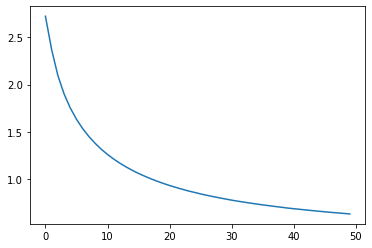

In [22]:
plt.plot(diff_in_mean)

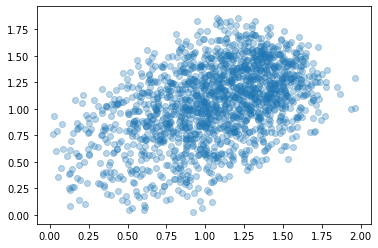

In [32]:
plt.scatter(V[:,0],V[:,1].T, alpha=0.3)

In [96]:
class MatrixFactorization:
    
    def __init__(self, ratings, k, lr, lam):
    
        
        self.ratings = ratings 
        m,n = self.ratings.shape
        
        self.k = k
        self.lr = lr 
        self.lam = lam
        self.U = np.random.rand(m,k)
        self.V = np.random.rand(n,k)
        self.isTrained = False

    def get_ratings(self,idxs):
        
        return self.ratings[idxs]
    
    def get_diff_in_mean(self):
        
        try:
            if self.isTrained:
                return self.diff_in_mean
            else:
                raise Exception("Not trained yet.")
        except Exception as e:
            print(e)
    
    def fit(self, n_epochs):
    
        self.diff_in_mean = []
        indices_list = (list(zip(*(np.where(np.isfinite(self.ratings))))))    
        print("Starting to train.")
        for k in range(n_epochs):
            random.shuffle(indices_list)
            for idx in indices_list:
                i, j = idx
                r_ij = self.get_ratings(idx)
                e_ij = r_ij - np.dot(self.U[i,:],self.V[j,:])
        
                u_ij = self.U[i,:] + self.lr*(e_ij*self.V[j,:]-self.lam*self.U[i,:])
                v_ij = self.V[j,:] + self.lr*(e_ij*self.U[i,:]-self.lam*self.V[j,:])

                self.U[i,:] = u_ij
                self.V[j,:] = v_ij
            current_diff = np.abs(np.nanmean(self.ratings)-np.mean(np.dot(self.U,self.V.T)))
            print(f"Current diff at epoch {k+1} is {current_diff}")
            self.diff_in_mean.append(current_diff)
            
        print("Training completed.")    
        self.isTrained = True
        

In [107]:
mf = MatrixFactorization(user_item_matrix.values, 2, 0.005,0.01)

In [108]:
mf.get_diff_in_mean()

Not trained yet.


In [109]:
mf.fit(100)

Starting to train.
Current diff at epoch 1 is 1.739069917779888
Current diff at epoch 2 is 1.3060263896061888
Current diff at epoch 3 is 1.086335641741155
Current diff at epoch 4 is 0.9494000275560537
Current diff at epoch 5 is 0.8578236170556894
Current diff at epoch 6 is 0.7891759322322369
Current diff at epoch 7 is 0.7380379166292332
Current diff at epoch 8 is 0.693330091423582
Current diff at epoch 9 is 0.6638978394769808
Current diff at epoch 10 is 0.6354694243854508
Current diff at epoch 11 is 0.6113181778586632
Current diff at epoch 12 is 0.5941359163856506
Current diff at epoch 13 is 0.573323881704257
Current diff at epoch 14 is 0.5603527786839453
Current diff at epoch 15 is 0.5495251724165624
Current diff at epoch 16 is 0.5380315943038823
Current diff at epoch 17 is 0.5254607415163264
Current diff at epoch 18 is 0.5164584756824557
Current diff at epoch 19 is 0.5086148168904785
Current diff at epoch 20 is 0.5028759209453191
Current diff at epoch 21 is 0.49798453550864785
Curren

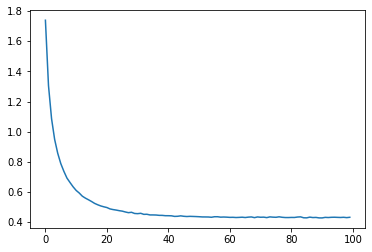

In [110]:
plt.plot(mf.diff_in_mean)

,user_id,item_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596
...,...,...,...,...
99995,880,476,3,880175444
99996,716,204,5,879795543
99997,276,1090,1,874795795
99998,13,225,2,882399156


In [124]:
mf.U*mf.V.T

ValueError: operands could not be broadcast together with shapes (943,2) (2,1682) 

In [155]:
np.dot(mf.U[0],mf.V[814].T)

2.807065162733161

In [156]:
df.groupby('item_id').mean().sort_values('rating')

,user_id,rating,timestamp
item_id,,,
1364,181.000000,1.0,8.789625e+08
1561,405.000000,1.0,8.855465e+08
1559,405.000000,1.0,8.855466e+08
1557,405.000000,1.0,8.855472e+08
1601,445.000000,1.0,8.911995e+08
...,...,...,...
1122,60.000000,5.0,8.833265e+08
814,13.000000,5.0,8.863023e+08
1653,675.000000,5.0,8.894899e+08
